# Boundary value problem

### In general case:

$L[y]=y''+p(x)y+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. Is this method stable for step size $h=0.125$? Find number of grid points required to achieve accuracy of the order of 1e-6.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-6.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

(!) Я понижу точность до 10е-3, а то мой ноутбук в жизни это не сосчитает (!)

Аппроксимация начальных условий трехточечной производной дает:
$$
Af(x) + Bf(x+h) + Cf(x+2h) = \alpha_{0}f(x) + \alpha_{1}f'(x)
$$
$$
(A + B + C)f(x) + (hB  + 2hC)f'(x) + (B\frac{h^2}{2} + 2hC)f''(x) = \alpha_{0}f(x) + \alpha_{1}f'(x)
$$
$$
A + B + C = \alpha_{0}, hB  + 2hC = \alpha_{1}, B\frac{h^2}{2} + 2hC = 0
$$
$$
A = \alpha_{0} - \frac{3\alpha_{1}}{2h}, B = \frac{2\alpha_{1}}{h}, C = -\frac{\alpha_{1}}{2h}
$$
Аппроксимация конечных условий аналогична, только h менает знак:
$$
A = \alpha_{0} + \frac{3\alpha_{1}}{2h}, B = - \frac{2\alpha_{1}}{h}, C = \frac{\alpha_{1}}{2h}
$$

При 0,125 решение еще будет устойивым, так как на всем интервале $|p(x)*h| = |\ln(x)*0,125| < 2$

Число точек в первой функции (second-order) - 1000 , во второй (first-order) - 1000 . Различий не возникло


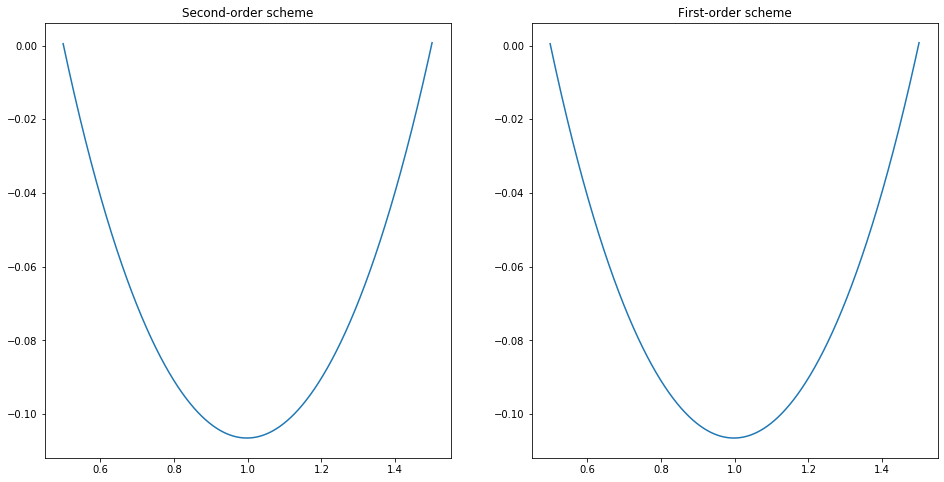

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

#1.1.
def SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
   
    
    x = np.linspace(a, b, N)
    F = [f(i) for i in x]
    P = [p(i) for i in x]
    Q = [q(i) for i in x]
    h = (b - a) / (N - 1)
    b = np.zeros(N)
    M = np.zeros((N, N))
    
    #зашьем в матрицу граничные условия с помощью трехточечной производной
    
    M[0][0] = alpha[0] + 3 * alpha[1] / 2 / h
    M[0][1] = 2 * alpha[1] / h
    M[0][2] = - alpha[1] / 2 / h
    b[0] = A
    
    M[N-1][N-3] = alpha[0] - 3 * alpha[1] / 2 / h
    M[N-1][N-2] = - 2 * alpha[1] / h
    M[N-1][N-1] = alpha[1] / 2 / h
    b[N-1] = B

    for i in range(1, N-1):
        b[i] = h**2 * F[i]
        M[i][i-1] = 1 - h / 2 * P[i]
        M[i][i] = - 2 + h**2 * Q[i]
        M[i][i+1] = 1 + h / 2 * P[i]
    
    y = solve(M, b)
    return y

#1.2.
def FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    x = np.linspace(a, b, N)
    F = [f(i) for i in x]
    P = [p(i) for i in x]
    Q = [q(i) for i in x]
    h = (b - a) / (N - 1)
    b = np.zeros(N)
    M = np.zeros((N, N))
    
    #зашьем в матрицу граничные условия с помощью трехточечной производной
    
    M[0][0] = alpha[0] + 3 * alpha[1] / 2 / h
    M[0][1] = 2 * alpha[1] / h
    M[0][2] = - alpha[1] / 2 / h
    b[0] = A
    
    
    
    M[N-1][N-3] = alpha[0] - 3 * alpha[1] / 2 / h
    M[N-1][N-2] = - 2 * alpha[1] / h
    M[N-1][N-1] = alpha[1] / 2 / h
    b[N-1] = B

    #ВОТ ТУТ ЗАКЛЮЧЕНО ВСЕ ОТЛИЧИЕ ОТ ПЕРВОЙ ФУНКЦИИ
    for i in range(1, N-1):
        b[i] = h**2 * F[i]
        M[i][i-1] = 1
        M[i][i] = h**2 * Q[i] - P[i] * h - 2
        M[i][i+1] = 1 + h * P[i]
    
    y = solve(M, b)
    return y

def p(x):
    return - np.log(x)
    
def q(x):
    return -2
    
def f(x):
    return 1
    
#подбор точности до 10е-3 для первого графика
y1_old = np.zeros(250)

#такие числа взяты, чтобы можно было сравнивать текущий результат с предыдущим, просто выбирая значения для текущего 
#в каждой второй точке
for N in(500, 1000, 2000, 4000, 8000):
    y1_new = SecondOrderScheme(0.5, 1.5, 1, 0, [1, 1], [1, -1], p, q, f, N)
    
    eps1 = []
    for i in range(len(y1_old)):
        eps1.append(y1_old[i] - y1_new[2*i])
        
    if abs(max(eps1, key = abs)) < 10e-3:
        n1 = N
        break
        
    y1_old = y1_new
    
#подбор точности до 10е-3 для второго графика
y2_old = np.zeros(250)
for N in(500, 1000, 2000, 4000, 8000):
    y2_new = FirstOrderScheme(0.5, 1.5, 1, 0, [1, 1], [1, -1], p, q, f, N)
    
    eps2 = []
    for i in range(len(y2_old)):
        eps2.append(y2_old[i] - y2_new[2*i])
        
    if abs(max(eps2, key = abs)) < 10e-3:
        n2 = N
        break
        
    y2_old = y2_new

x1 = np.linspace(0.5, 1.5, n1)
x2 = np.linspace(0.5, 1.5, n2)
y1 = SecondOrderScheme(0.5, 1.5, 1, 0, [1, 1], [1, -1], p, q, f, n1)
y2 = FirstOrderScheme(0.5, 1.5, 1, 0, [1, 1], [1, -1], p, q, f, n2)
    
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16, 8))
ax[0].plot(x1, y1)
ax[0].set_title('Second-order scheme')
ax[1].plot(x2, y2)
ax[1].set_title('First-order scheme')

print("Число точек в первой функции (second-order) -", n1, ", во второй (first-order) -", n2, ". Различий не возникло")

# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

1.0
0.0002755745646635388


Text(0.5, 1.0, 'Galerkin method')

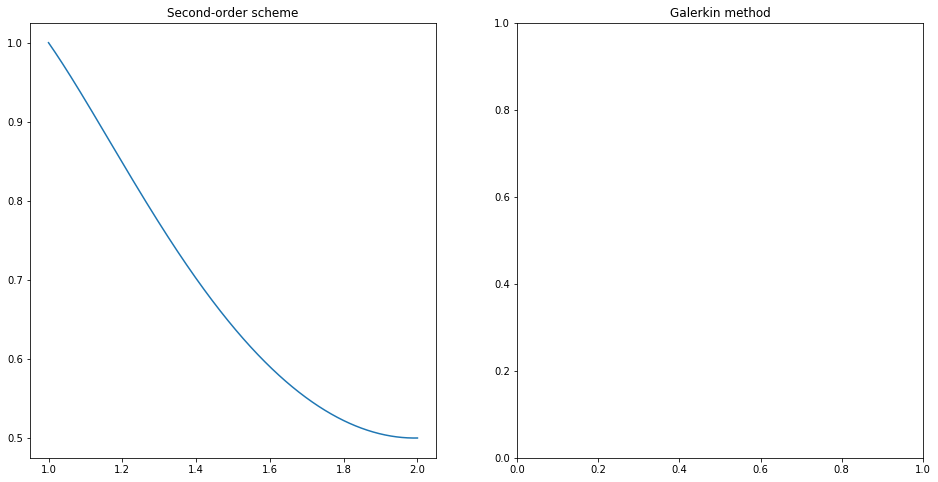

In [48]:
def p1(x):
    return 2

def q1(x):
    return - 3 * x

def f1(x):
    return (2 - 8 * x) / x**3

#здесь я проверяю, что тысячи точек хватает для точности 10е-3
y2_old = np.zeros(250)
for N in(500, 1000, 2000, 4000, 8000):
    y2_new = SecondOrderScheme(1, 2, 1, 0.5, [1, 0], [1, 0], p1, q1, f1, N)
    
    eps2 = []
    for i in range(len(y2_old)):
        eps2.append(y2_old[i] - y2_new[2*i])
    
    print(abs(max(eps2, key = abs)))
        
    if abs(max(eps2, key = abs)) < 10e-3:
        n2 = N
        break
        
    y2_old = y2_new
    
#def Galerkin():
    #так как я немного не успеваю, напишу не универсальную функцию, а только для этой задачи
    #заменим x -> x - 1 и получим задачу на (0, 1). Для нее можно использовать присоединенные полиномы Лежандра
    
    
x3 = np.linspace(1, 2, 1000)
y3 = SecondOrderScheme(1, 2, 1, 0.5, [1, 0], [1, 0], p1, q1, f1, 1000)

fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize = (16, 8))
ax1[0].plot(x3, y3)
ax1[0].set_title('Second-order scheme')
ax1[1].set_title('Galerkin method')